In [1]:
# imports
from data_creation import create_data
from util import read_data, calculate_n_sets, save_ng_result, save_dng_results, read_ng_data, read_ng_test_data, read_dng_data, read_dng_test_data, calculate_route_costs
from routing import dynamic_ng_pathing, ng_routing
from computational_experiment import test_delta1_for_ng_routing, test_delta1_and_delta2_for_dng_pathing
from visualize import visualize_route, visualize_nodes
from nearest_neighbor import find_nearest_neighbours_path
import matplotlib.pyplot as plt
import shutil
import os
from statistics import mean

In [2]:
path = '/Users/lukas/Documents/Master Thesis/'

In [3]:
# what to do
create_new_data = False
clear_exports = True

conduct_nn_routing = False
conduct_ng_routing = False
conduct_dng_pathing = False
conduct_ng_testing = True
conduct_dng_testing = False

In [4]:
# Data Creation Parameters
amount = 8
range_x = 50
range_y = 50

In [5]:
# Hyper Parameters
starting_node = 0
delta1 = 5
delta2 = 8

In [6]:
# Testing Parameters:
iterations_ng = 10
iterations_dng = 5

In [7]:
if os.path.isdir(path + "export"):
    if clear_exports:
        shutil.rmtree(path + "export")

In [8]:
# Data preparation
if create_new_data:
    create_data(amount, range_x, range_y, path)

costs_list, nodes = read_data(path)
node_objects = calculate_n_sets(costs_list, nodes, delta1)
to_visit = list(range(0, len(nodes)))
to_visit.remove(starting_node)

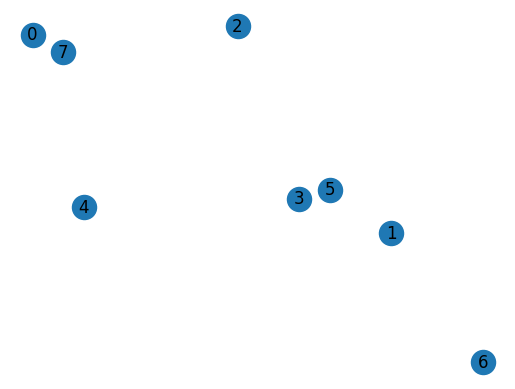

In [9]:
visualize_nodes(nodes)

Nearest Neighbor

In [10]:
if conduct_nn_routing:
    nn_route = find_nearest_neighbours_path(nodes.copy(), costs_list, starting_node)
    visualize_route(nodes, nn_route, calculate_route_costs(nn_route, costs_list), True, "nn_route", 0, path)

Ng-Routing

In [11]:
if conduct_ng_routing:
    save_ng_result(path, ng_routing(starting_node, node_objects.copy(), to_visit.copy(), [], len(nodes), costs_list))
    ng_data = read_ng_data(path)
    visualize_route(nodes, ng_data.best_route, ng_data.min_value, True, "ng_route", 0, path)

Dynamic Ng-Pathing

In [12]:
if conduct_dng_pathing:
    dng_result, results = dynamic_ng_pathing(starting_node, node_objects.copy(), to_visit.copy(), [], len(nodes), delta2, costs_list)
    save_dng_results(path, results)
    dng_data = read_dng_data(path)
    for i in range(0, len(dng_data)):
        plt.figure(i)
        visualize_route(nodes, dng_data[i].best_route, dng_data[i].min_cost, True, "dng_route_iteration", i+1, path)

Ng Testing


Data of 10 iterations

Finding Mean Delta1 for permitted solutions
7.6

Finding mean decrease in time for increase in delta1
0.462

Finding mean decrease in cardinality for increase of delta1
1987.614


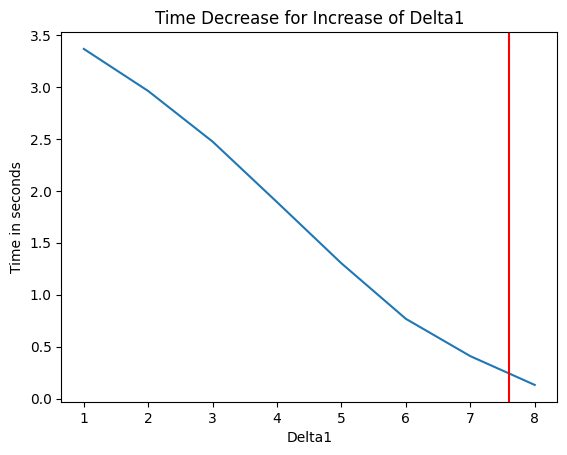

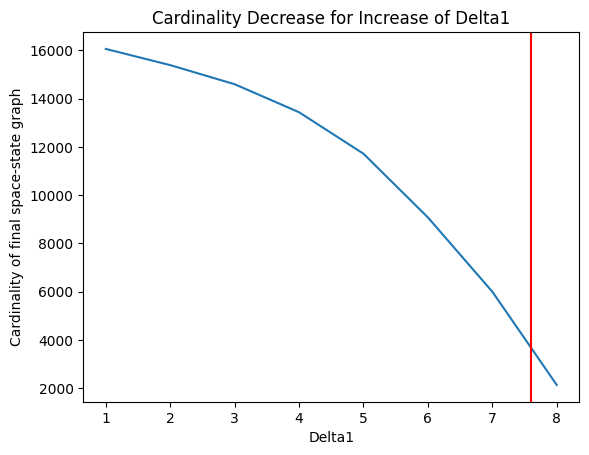

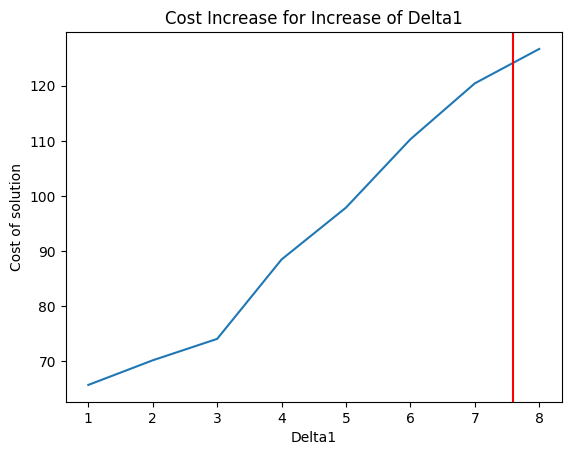

In [49]:
if conduct_ng_testing:
    # test_delta1_for_ng_routing(path, amount, range_x, range_y, starting_node, iterations_ng)
    ng_test_data = read_ng_test_data(path)

    delta1_array = []
    for i in range(len(ng_test_data[0])):
        delta1_array.append(i+1)

    elementary_delta1 = []
    for result_list in ng_test_data:
        for result in result_list:
            if result.elementary:
                elementary_delta1.append(result.delta1)
                break

    time_difference = []
    cardinality_difference = []
    for result_list in ng_test_data:
        for i in range(0, len(result_list)-1):
            time_difference.append(result_list[i].time - result_list[i+1].time)
            cardinality_difference.append(result_list[i].cardinality - result_list[i+1].cardinality)

    time_per_delta1 = []
    cardinality_per_delta1 = []
    cost_per_delta1 = []

    for result in ng_test_data[0]:
        time_per_delta1.append([])
        cardinality_per_delta1.append([])
        cost_per_delta1.append([])

    for i in range(len(ng_test_data)):
        for j in range(len(ng_test_data[i])):
            time_per_delta1[j].append(ng_test_data[i][j].time)
            cardinality_per_delta1[j].append(ng_test_data[i][j].cardinality)
            cost_per_delta1[j].append(ng_test_data[i][j].min_value)

    mean_time_per_delta1 = []
    for array in time_per_delta1:
        mean_time_per_delta1.append(mean(array))

    mean_cardinality_per_delta1 = []
    for array in cardinality_per_delta1:
        mean_cardinality_per_delta1.append(mean(array))

    mean_cost_per_delta1 = []
    for array in cost_per_delta1:
        mean_cost_per_delta1.append(mean(array))

    print()
    print("Data of " + str(len(ng_test_data)) + " iterations")

    print()
    print("Finding Mean Delta1 for permitted solutions")
    print(round(mean(elementary_delta1), 3))
    print()

    print("Finding mean decrease in time for increase in delta1")
    print(round(mean(time_difference), 3))
    print()

    print("Finding mean decrease in cardinality for increase of delta1")
    print(round(mean(cardinality_difference), 3))

    # TODO plot mean_time_per_delta1 and mean_cardinality_per_delta1
    plt.figure(1)
    plt.title("Time Decrease for Increase of Delta1")
    plt.plot(delta1_array, mean_time_per_delta1)
    plt.ylabel('Time in seconds')
    plt.xlabel('Delta1')
    plt.axvline(x = round(mean(elementary_delta1), 3), color = 'r')
    plt.show()

    plt.figure(2)
    plt.title("Cardinality Decrease for Increase of Delta1")
    plt.plot(delta1_array, mean_cardinality_per_delta1)
    plt.ylabel('Cardinality of final space-state graph')
    plt.xlabel('Delta1')
    plt.axvline(x = round(mean(elementary_delta1), 3), color = 'r')
    plt.show()

    plt.figure(3)
    plt.title("Cost Increase for Increase of Delta1")
    plt.plot(delta1_array, mean_cost_per_delta1)
    plt.ylabel('Cost of solution')
    plt.xlabel('Delta1')
    plt.axvline(x = round(mean(elementary_delta1), 3), color = 'r')
    plt.show()

Dng Testing

In [ ]:
if conduct_dng_testing:
    test_delta1_and_delta2_for_dng_pathing(path, amount, range_x, range_y, starting_node, iterations_dng)
    dng_test_data = read_dng_test_data(path)
    # do stuff